# Thevenin EC-Model
This model is build following the procedure presented by G. Plett in his course on Equivalent Circuit (EC) Models (http://mocha-java.uccs.edu/ECE5710/index.html)

### Imports

In [ ]:
import context
import time
import matplotlib.pyplot as plt
import numpy as np

import src.models.thevenin_model as thevenin

### Set hyperparameters

In [ ]:
HYPER_PARAMETERS = {
    'gauss_sigma': 10,        # smoothing factor
    'd_sample': 2,            # subsampling ratio
    'stack': 0,               # battery stack used to extract the data from
    'cell': 4,                # specific battery cell to extract the data from          
    'convergence_steps': 50,  # time steps until the steady state is reached
}

TRAIN_PROFILE = 'Profile 10A'
t_0 = time.time()

### Load Profile

In [ ]:
train_current, train_voltage = thevenin.load_profile(TRAIN_PROFILE, HYPER_PARAMETERS, visualize = True)

## Compute Model Parameters

### Step 1: Instantaneuos Voltage Change to deduce $R_0$
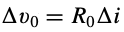

In [ ]:
r_0, delta_i, max_volt_change_index = thevenin.identify_instant_volt_change(train_current, train_voltage)

### Step 2: Steady State Voltage Change to deduce $R_1$
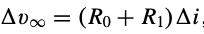

In [ ]:
r_1, max_decrease_index, steady_state_time, max_voltage_index, steady_state_index = thevenin.identify_steady_state_voltage_change(train_current, train_voltage, r_0, delta_i, max_volt_change_index, HYPER_PARAMETERS)

### Step 3: Time to decay to Steady State to deduce $C_1$
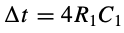

In [ ]:
c_1 = thevenin.identify_steady_state_time(train_current, train_voltage, r_1, max_decrease_index, steady_state_time, max_voltage_index, steady_state_index)

t_delta = time.time() - t_0
print('Training Time(s):', round(t_delta, 3))

### Save Parameters

In [ ]:
parameters = {
    'r_0': r_0,
    'r_1': r_1,
    'c_1': c_1,
}

MODEL_ID = str(np.random.randint(10000))
np.save('../../../models/T/theory_baseline-' + str(MODEL_ID) + '-parameters', parameters)
np.save('../../../models/T/theory_baseline-' + str(MODEL_ID) + '-hyperparameters', HYPER_PARAMETERS)
print('Model saved to /models/T/theory_baseline-' + str(MODEL_ID) +'...')

## SOC OCV relationship

In [ ]:
_ = thevenin.plot_OCV_curve()

## Voltage Prediction
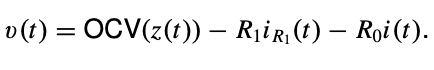

In [ ]:
yhat = thevenin.vis_predict(TRAIN_PROFILE, r_0, r_1, c_1, HYPER_PARAMETERS)

## Test Profile

In [ ]:
TEST_PROFILE = 'Profile 10A'
yhat = thevenin.vis_predict(TEST_PROFILE, r_0, r_1, c_1, HYPER_PARAMETERS)

## Test Use Cases

In [ ]:
profiles = ['Profile 10A', 'Profile 10A 3x', 'Profile -10A']
yhat = thevenin.vis_predict_usecases(profiles, r_0, r_1, c_1, HYPER_PARAMETERS)